In [3]:
import numpy as np
%matplotlib inline
from astropy import units
from astropy import constants
from astropy.table import Table
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size']  = 5 #12
plt.rcParams['ytick.major.size']  = 5#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec



from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.table import Table

In [4]:
targets = np.sort([i for i in os.listdir('.') if i.endswith('.fits')])
tables = np.sort([i for i in os.listdir('.') if i.endswith('.csv') and 'comet' in i])[:-1]


In [5]:
def open_fits(fn):
    hdu = fits.open(fn)
    return hdu

In [27]:
def plot_frame(data, index, ax, size=21):
    
    x = int(data[index].header['COMET_X'])
    y = int(data[index].header['COMET_Y'])
    
    cutout = data[index].data[x-size:x+size, y-size:y+size]
    
    img = ax.imshow(cutout, aspect='auto',
                    extent=[x-size, x+size, y-size, y+size], cmap='Greys',
                    vmin=np.nanmin(cutout), vmax=np.nanpercentile(cutout, 99.95),
                    origin='lower')
    linewidth=0.7
    ax.plot(x, y, 'o', markeredgecolor='r', markeredgewidth=linewidth,
            color='none', ms=30)
    
    xticks = np.linspace(x-size+2, x+size-2, 3, dtype=int)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontsize=fs2)
    
    yticks = np.linspace(y-size+2, y+size-2, 3, dtype=int)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks, fontsize=fs2)
    
    return img, x, y, np.nanmin(cutout), np.nanpercentile(cutout, 99.95)

1998_FR11.fits
idx, 0
2001_ME1.fits
idx, 1


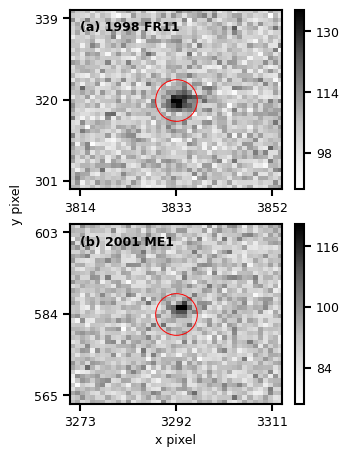

In [45]:
#fig, axes = plt.subplots(nrows=1, ncols=2,
 #                        figsize=(8.7*cm,11*cm))
fs2=9
linewidth=0.1
cm = 1/2.54  # centimeters in inches
fig, axes = plt.subplots(nrows=2, ncols=1, tight_layout=False,figsize=(8.7*cm,13*cm),sharex=False,sharey=False
                       ,gridspec_kw={'hspace': 0.19, 'wspace': 0.1})
axes = axes.reshape(-1)

frame = [20, 13, 40, 50, 
         20, 
         10, 24, 10, 38, 20, 20]

frame = [13,40]
size = [21, 21, 21, 21, 
        21, 
        21, 21, 21, 21, 21, 21]
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

for i, idx in enumerate([0, 1]):
    data = open_fits(targets[idx])
    print(targets[idx])
    print("idx,",idx)
    img, x, y, vmin, vmax = plot_frame(data, frame[idx], axes[i], size=size[idx])
    
    cbar = plt.colorbar(img, ax=axes[i])
    ticks = np.linspace(vmin+10, vmax-5, 3, dtype=int)
    cbar.set_ticks(ticks)
    cbar.set_ticklabels(ticks, fontsize=fs2)
    
    name = ' '.join(e for e in targets[idx].split('.')[0].split('_'))
    if name == '2003 XY20':
        name = '2013 XY20'
    
    axes[i].text(s='({0}) {1}'.format(letter[i], name), 
                   x=x-size[idx]+2, y=y+size[idx]-5, fontweight='bold',
                   fontsize=fs2, zorder=100)
    
    if i == 3:
        length = 32
    else:
        length = 28
        
    axes[i].plot(np.linspace(x-size[idx]+3, x-size[idx]+length, 10),
                   np.full(10, y+size[idx]-3.8), color='w', lw=linewidth,
                   alpha=0.8, zorder=20)
    
    data.close()
    

axes[1].set_xlabel('x pixel')#, fontweight='bold')

fig.text(-0.03, 0.5, 'y pixel', ha='center', va='center', rotation='vertical')



plt.subplots_adjust(wspace=0.35, hspace=0.3)

plt.savefig('Figure4_DecamDetections_Vector.pdf',
            format='pdf',bbox_inches='tight', dpi=600)